In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing

In [35]:
# data
dataset = np.array([[2.7810836,2.550537003,0],
           [1.465489372,2.362125076,0],
           [3.396561688,4.400293529,0],
           [1.38807019,1.850220317,0],
           [3.06407232,3.005305973,0],
           [7.627531214,2.759262235,1],
           [5.332441248,2.088626775,1],
           [6.922596716,1.77106367,1],
           [8.675418651,-0.242068655,1],
           [7.673756466,3.508563011,1]])
dataset_x = dataset

In [3]:
x = dataset[:, :-1]
y = dataset[:, -1:]

In [4]:
# scale the features / mean normalization
x = preprocessing.scale(x)

In [5]:
m, n = x.shape[0], x.shape[1]

ones = np.ones((m,1))

x_train = np.hstack([ones, x])

In [6]:
clf =linear_model.LogisticRegression()
clf.fit(x,y)

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
clf.intercept_

array([0.05934746])

In [8]:
clf.coef_

array([[ 1.51008137, -0.42186444]])

In [9]:
params = np.array([[clf.intercept_[0]],[clf.coef_[:, 0:1]], [clf.coef_[:, 1:2]]])

In [10]:
y_sklearn = np.dot(x_train, params)

In [51]:
dataset_x = preprocessing.scale(dataset_x[:, :2])
dataset_x = np.hstack([dataset_x,dataset[:, -1:]])
# separate out 0 and 1 classes
zeros = dataset_x[dataset_x[:, 2] == 0, 0:2]
ones = dataset_x[dataset_x[:, 2] == 1, 0:2]

In [52]:
y_pred = 1/(1+np.exp(-(np.dot(x_train, params))))

#  separte the two different classes using a linear separable line
# for y = 1; theta.T * x >= 0

x2 = (-1/clf.coef_[:,1:2][0,0])* ((clf.intercept_[0] + clf.coef_[:,0:1][0,0] *x[:, :1]))
x2

array([[-2.67825996],
       [-4.48589608],
       [-1.83258855],
       [-4.59227061],
       [-2.28943138],
       [ 3.98079464],
       [ 0.82732418],
       [ 3.01220947],
       [ 5.42059967],
       [ 4.04430848]])

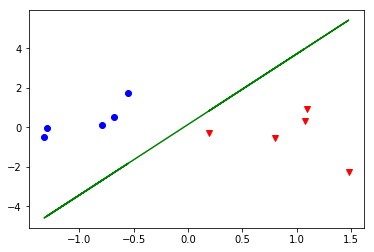

In [53]:
# data visulaziation
fig, aux = plt.subplots()
aux.plot(zeros[:,0], zeros[:,1], 'bo', ones[:,0], ones[:,1], 'rv', x[:, :1], x2, 'g-')
plt.show()